In [1]:
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime

time: 198 µs (started: 2023-01-04 12:13:19 +08:00)


In [2]:
# check python version
# lensinggw package requires python 3.8+

! python --version

Python 3.9.13
time: 127 ms (started: 2023-01-04 12:13:20 +08:00)


In [3]:
# cd to lenstronomy location
%cd /Users/genebelinario/Documents/dnc_research/thesis/notebooks
!ls

/Users/genebelinario/Documents/dnc_research/thesis/notebooks
LOSC_Event_tutorial-master lenstronomy_solver.ipynb
gw_microlensing.ipynb      near_source.ipynb
gwlensing_10e7.ipynb       plot_10e610e7.ipynb
lensed_gw.ipynb            plots.ipynb
lensed_unlensed_gw.ipynb   source_0.png
lensinggw                  source_1.png
lensinggw_setup.ipynb      source_2.png
lenstronomy                try.ipynb
time: 129 ms (started: 2023-01-04 12:13:21 +08:00)


In [4]:
# import libraries and packages

import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import configparser
import pandas as pd

time: 758 ms (started: 2023-01-04 12:13:21 +08:00)


In [5]:
# import specific packages
from lensinggw.utils.utils import param_processing
from lensinggw.solver.images import microimages
from lensinggw.utils.utils import TimeDelay, magnifications, getMinMaxSaddle
from lensinggw.amplification_factor.amplification_factor import geometricalOpticsMagnification
from lensinggw.postprocess.postprocess import plot_images

time: 789 ms (started: 2023-01-04 12:13:23 +08:00)


In [6]:
# This script illustrates how to use lensingGW's unlensed waveform routines

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the unlensed waveform polarizations, strains in the requested detectors and their frequencies
freqs, hp_tilde, hc_tilde, strain_dict = waveform_model.unlensed_gw()

# and their signal-to-noise-ratios
SNR_dict = waveform_model.unlensed_snr()

# access an unlensed strain
sH1 = strain_dict['H1']


---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Unlensed SNR in H1 = 1.80
Network SNR of the unlensed simulation 1.804045

time: 40

In [7]:
# Lensed GW for mSIE=10e6

# Lensed Gravitational waves by PML on the Positive Parity Side of the SIE

# This script illustrates how to use lensingGW's lensed waveform routines
import numpy as np

######################
# lens configuration #
######################

# position in scaled units
y0, y1 = 0, 0.5

# redshifts
zL, zS = 0.5, 2.0

# lens mass
mSIE_10e6 = 10**6

# convert to radians
from lensinggw.utils.utils import param_processing
                                                                                                                             
thetaE_SIE_10e6  = param_processing(zL, zS, mSIE_10e6)    
beta0,beta1 = y0*thetaE_SIE_10e6, y1*thetaE_SIE_10e6

# source position, in radians
beta0, beta1 = y0*thetaE_SIE_10e6, y1*thetaE_SIE_10e6


# binary point mass lens model
lens_model_list     = ['SIE']
kwargs_SIE          = {"center_x":0.0, 'center_y':0.0, 'theta_E':thetaE_SIE_10e6, 'e1':-0.081, 'e2':0}
kwargs_lens_list    = [kwargs_SIE]

# binary point mass images, in radians
ra_10e6  = np.array([7.64953018e-21, -4.96308526e-24, -4.96308526e-24])
dec_10e6 = np.array([1.43606231e-08, -4.39823477e-09, -1.56357004e-10])

####################
# lensed waveforms #
####################

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the lensed waveform polarizations, strains in the requested detectors and their frequencies
freqs_lensed_10e6, hp_tilde_lensed_10e6, hc_tilde_lensed_10e6, lensed_strain_dict_10e6 = waveform_model.lensed_gw(ra_10e6,dec_10e6,
                                                                                              beta0,beta1,
                                                                                              zL, zS,
                                                                                              lens_model_list,
                                                                                              kwargs_lens_list)

# and their signal-to-noise-ratios
lensed_SNR_dict_10e6 = waveform_model.lensed_snr(ra_10e6,dec_10e6,
                                            beta0,beta1,
                                            zL, zS,
                                            lens_model_list,
                                            kwargs_lens_list)

# access a lensed strain
lensed_sH1_10e6 = lensed_strain_dict_10e6['H1']


---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Lensed SNR in H1 = 3.86
Network SNR of the lensed simulation 3.859396

time: 53.7 m

In [8]:
# Lensed GW for mSIE=10e7

# Lensed Gravitational waves by PML on the Positive Parity Side of the SIE

# This script illustrates how to use lensingGW's lensed waveform routines
import numpy as np

######################
# lens configuration #
######################

# position in scaled units
y0, y1 = 0, 0.5

# redshifts
zL, zS = 0.5, 2.0

# lens mass
mSIE_10e7 = 10**7

# convert to radians
from lensinggw.utils.utils import param_processing
                                                                                                                             
thetaE_SIE_10e7  = param_processing(zL, zS, mSIE_10e7)    
beta0,beta1 = y0*thetaE_SIE_10e7, y1*thetaE_SIE_10e7

# source position, in radians
beta0, beta1 = y0*thetaE_SIE_10e7, y1*thetaE_SIE_10e7


# binary point mass lens model
lens_model_list     = ['SIE']
kwargs_SIE          = {"center_x":0.0, 'center_y':0.0, 'theta_E':thetaE_SIE_10e7, 'e1':-0.081, 'e2':0}
kwargs_lens_list    = [kwargs_SIE]

# binary point mass images, in radians
ra_10e7  = np.array([1.32340824e-23,  1.32340824e-23, -1.10999644e-24])
dec_10e7 = np.array([-1.43945922e-08,  4.55605308e-08, -1.50526131e-10])

####################
# lensed waveforms #
####################

from lensinggw.waveform.waveform import gw_signal

# read the waveform parameters
config_file = '/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/ini_files/waveform_config.ini'

# instantiate the waveform model
waveform_model = gw_signal(config_file)

# compute the lensed waveform polarizations, strains in the requested detectors and their frequencies
freqs_lensed_10e7, hp_tilde_lensed_10e7, hc_tilde_lensed_10e7, lensed_strain_dict_10e7 = waveform_model.lensed_gw(ra_10e7,dec_10e7,
                                                                                              beta0,beta1,
                                                                                              zL, zS,
                                                                                              lens_model_list,
                                                                                              kwargs_lens_list)

# and their signal-to-noise-ratios
lensed_SNR_dict_10e7 = waveform_model.lensed_snr(ra_10e7,dec_10e7,
                                            beta0,beta1,
                                            zL, zS,
                                            lens_model_list,
                                            kwargs_lens_list)

# access a lensed strain
lensed_sH1_10e7 = lensed_strain_dict_10e7['H1']


---- Will simulate a signal with the following parameters ----

m1          --> 45
m2          --> 36
spin1x      --> 0.0
spin1y      --> 0.0
spin1z      --> 0.0
spin2x      --> 0.0
spin2y      --> 0.0
spin2z      --> 0.0
distance    --> 15521.788104196934
ra          --> 0
dec         --> 4.904407255147181e-09
psi         --> 0.0
inclination --> 2.6
phi0        --> 0.0
lambda1     --> 0.0
lambda2     --> 0.0


---- Will use the following setup ----

flow          --> 20.0
fhigh         --> 1024
fref          --> 20.0
df            --> 0.125
sampling-rate --> 2048
approximant   --> IMRPhenomPv2
amp_order     --> 0
phase_order   --> -1
starttime     --> -7.0
trigtime      --> 0.0


---- Will simulate the signal in the following detectors ----

H1     --> True
H1-psd --> /Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat


Lensed SNR in H1 = 3.86
Network SNR of the lensed simulation 3.859201

time: 24.4 m

## Plots

In [12]:
aLIGO_freq = []
aLIGO_strain = []

with open(r"/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-aLIGO_DESIGN_psd.dat") as datFile:
    for data in datFile:
        aLIGO_freq.append(float(data.split()[0]))
        aLIGO_strain.append(float(data.split()[1]))

AdV_freq = []
AdV_strain = []

with open(r"/Users/genebelinario/Documents/dnc_research/thesis/notebooks/lensinggw/lensinggw/examples/psds/LIGO-P1200087-v18-AdV_DESIGN_psd.dat") as datFile1:
    for data in datFile1:
        AdV_freq.append(float(data.split()[0]))
        AdV_strain.append(float(data.split()[1]))



time: 8.4 ms (started: 2023-01-04 13:13:56 +08:00)


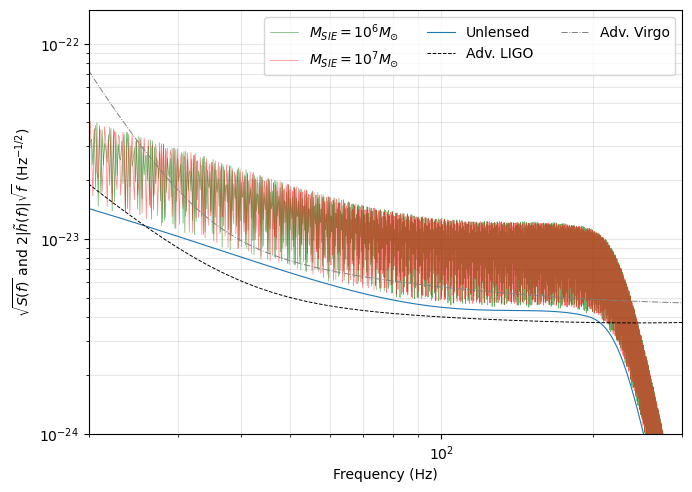

time: 612 ms (started: 2023-01-05 00:23:25 +08:00)


In [208]:
# Frequency Domain vs aLIGO and Adv Virgo sensiticity curves

fig0, axs0 = plt.subplots(nrows=1, ncols=1, figsize=(7,5))

axs0.plot(freqs_lensed_10e6, (2*np.abs(lensed_sH1_10e6))*(freqs_lensed_10e6)**(1/2), 
          label=r'$M_{SIE}=10^6M_{\odot}$', linewidth=0.5, color='green', alpha=0.6)
axs0.plot(freqs_lensed_10e7, (2*np.abs(lensed_sH1_10e7))*(freqs_lensed_10e7)**(1/2), 
          label=r'$M_{SIE}=10^7M_{\odot}$', linewidth=0.5, color='red', alpha=0.5)
axs0.plot(freqs, (2*np.abs(sH1))*(freqs)**(1/2), label='Unlensed', linewidth=0.8)

axs0.plot(np.array(aLIGO_freq), (np.array(aLIGO_strain))**(1/2), label='Adv. LIGO', 
         linewidth=0.7, linestyle='--', color='black')
axs0.plot(np.array(AdV_freq), (np.array(AdV_strain))**(1/2), label='Adv. Virgo', 
         linewidth=0.7, linestyle='-.', color='grey')

axs0.set_xlim([20, 300])
axs0.set_ylim([10e-25, 1.5*10e-23])
axs0.set_xscale('log')
axs0.set_yscale('log')
axs0.minorticks_on()

#axs0.set_title(r'Normalized Strains of Lensed GW Signal')
axs0.set(xlabel=r'Frequency (Hz)', ylabel=r'$\sqrt{S(f)}$ and $2|\tilde{h}(f)|\sqrt{f}$ (Hz$^{-1/2}$)')
axs0.legend(ncol=1, loc='upper right')

plt.grid(True, which='both', alpha=0.3)
plt.legend(ncol=3, loc='upper right')
plt.tight_layout(pad=1, w_pad=0, h_pad=2)
plt.savefig('/Users/genebelinario/Documents/dnc_research/thesis/figures/NormalizedStrains', dpi=300)
plt.show()

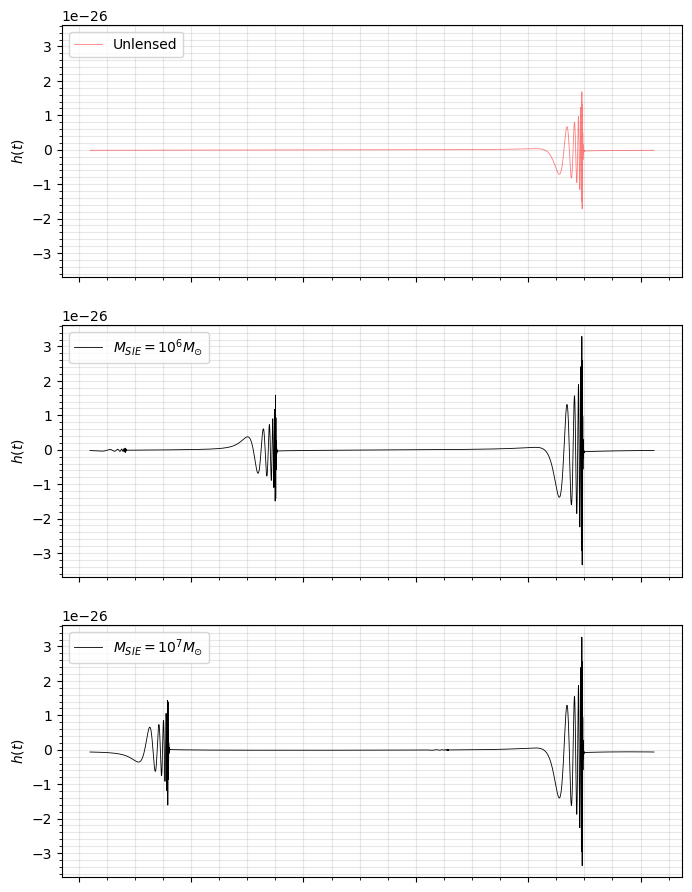

time: 670 ms (started: 2023-01-04 20:44:57 +08:00)


In [114]:
fig1, axs1 = plt.subplots(nrows=3, ncols=1, figsize=(7,9), sharex=False, sharey=True)

axs1[0].plot(freqs, np.real(np.fft.ifft(sH1)), color='red', alpha=0.5, linewidth=0.6, 
             label='Unlensed')
axs1[0].set(ylabel=r'$h(t)$')
axs1[0].set_xticklabels([])
axs1[0].minorticks_on()
axs1[0].legend(loc='upper left')
axs1[0].grid(True, which='both', alpha=0.3)


axs1[1].plot(freqs_lensed_10e6, np.real(np.fft.ifft(lensed_sH1_10e6)), color='black', linewidth=0.6, 
            label=r'$M_{SIE}=10^6M_{\odot}$')
axs1[1].set(ylabel=r'$h(t)$')
axs1[1].set_xticklabels([])
axs1[1].minorticks_on()
axs1[1].legend(loc='upper left')
axs1[1].grid(True, which='both', alpha=0.3)

axs1[2].plot(freqs_lensed_10e7, np.real(np.fft.ifft(lensed_sH1_10e7)), color='black', linewidth=0.6,
            label=r'$M_{SIE}=10^7M_{\odot}$')
axs1[2].set(ylabel=r'$h(t)$')
axs1[2].set_xticklabels([])
axs1[2].minorticks_on()
axs1[2].legend(loc='upper left')
axs1[2].grid(True, which='both', alpha=0.3)

plt.tight_layout(pad=1, w_pad=0, h_pad=2)
#plt.grid(True, which='both', alpha=0.)
#plt.legend()
plt.savefig('/Users/genebelinario/Documents/dnc_research/thesis/figures/UnlensedLensedStrains', dpi=300)
plt.show()

/var/folders/z7/s5rym2f96s37ltj5j14bx20w0000gn/T/ipykernel_32588/1053654281.py:4: RuntimeWarning: invalid value encountered in true_divide
  ratio_10e6 = lensed_sH1_10e6/sH1


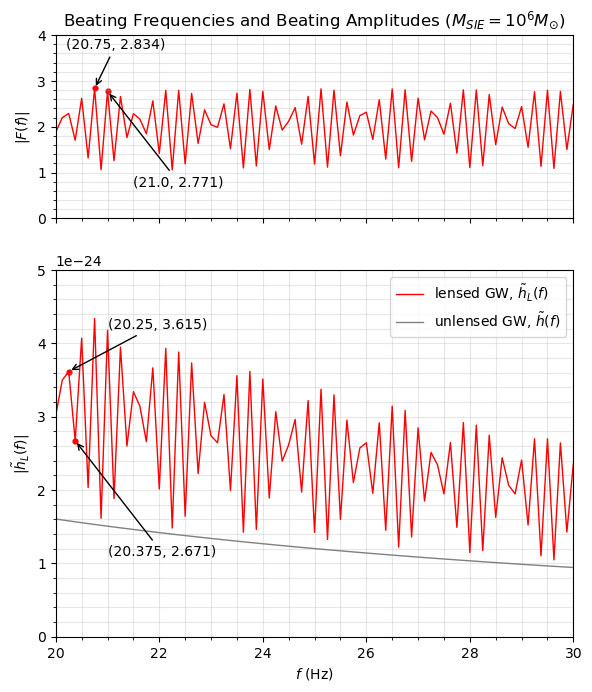

time: 572 ms (started: 2023-01-05 13:12:06 +08:00)


In [264]:
# Fringe Analysis
# mSIE = 10^6

ratio_10e6 = lensed_sH1_10e6/sH1
F_10e6 = np.abs(np.nan_to_num(ratio_10e6))

fig2, axs2 = plt.subplots(sharex=True, nrows=2, ncols=1, figsize=(6,7), gridspec_kw={'height_ratios': [1, 2]})

axs2[0].plot(freqs_lensed_10e6, F_10e6, color='red', linewidth=1)
axs2[0].scatter([freqs_lensed_10e6[6],freqs_lensed_10e6[8]], [F_10e6[6],F_10e6[8]], color='red', marker='o', s=12)
axs2[0].set_xlim([20,30])
axs2[0].set_ylim([0, 4])
axs2[0].minorticks_on()
axs2[0].set(ylabel=r'$|F(f)|$')
#axs2[0].set_xscale('log')
#axs2[0].set_yscale('log')
axs2[0].set_title(r'Beating Frequencies and Beating Amplitudes ($M_{SIE}=10^6M_{\odot}$)')
axs2[0].grid(True, which='both', alpha=0.3)
axs2[0].annotate('('+str(freqs_lensed_10e6[6])+', 2.834)', xy=(freqs_lensed_10e6[6], F_10e6[6]), xytext=(20.2, 3.70),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axs2[0].annotate('('+str(freqs_lensed_10e6[8])+', 2.771)', xy=(freqs_lensed_10e6[8], F_10e6[8]), xytext=(21.5, 0.7),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

axs2[1].plot(freqs_lensed_10e6, np.abs(lensed_sH1_10e6), color='red', linewidth=1, label=r'lensed GW, $\tilde{h}_L(f)$')
axs2[1].plot(freqs, np.abs(sH1), color='gray', linewidth=1, label=r'unlensed GW, $\tilde{h}(f)$')
axs2[1].scatter(freqs_lensed_10e6[2:4], np.abs(lensed_sH1_10e6)[2:4], color='red', marker='o', s=12)
axs2[1].set_xlim([20,30])
axs2[1].set_ylim([0e-24, 5e-24])
#axs2[1].set_xscale('log')
#axs2[1].set_yscale('log')
#axs2[1].set_xticklabels(rotation=90)
axs2[1].minorticks_on()
axs2[1].set(xlabel=r'$f$ (Hz)', ylabel=r'$|\tilde{h}_L(f)|$')
#axs2[1].annotate(20.2, 77e-25, , color='red')
#axs2[1].text(20.4, 48e-25, str((freqs[2], 3.102)), color='red')
axs2[1].annotate('('+str(freqs_lensed_10e6[2])+', 3.615)', xy=(freqs_lensed_10e6[2], np.abs(lensed_sH1_10e6)[2]), xytext=(21, 4.2e-24),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axs2[1].annotate('('+str(freqs_lensed_10e6[3])+', 2.671)', xy=(freqs_lensed_10e6[3], np.abs(lensed_sH1_10e6)[3]), xytext=(21, 1.1e-24),
                            arrowprops=dict(arrowstyle="->", connectionstyle='arc3'))

plt.tight_layout(pad=1, w_pad=0, h_pad=2)
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.savefig('/Users/genebelinario/Documents/dnc_research/thesis/figures/LensMass_10e6', dpi=300)
plt.show()

In [265]:
lens_mass_10e6 = (1.25*1e4)*(3.615/2.671)/(21-20.75)
print(lens_mass_10e6)

# 2 orders of magnitude away from 10^6

67671.28416323476
time: 622 µs (started: 2023-01-05 13:12:10 +08:00)


/var/folders/z7/s5rym2f96s37ltj5j14bx20w0000gn/T/ipykernel_32588/3086302070.py:4: RuntimeWarning: invalid value encountered in true_divide
  ratio_10e7 = lensed_sH1_10e7/sH1


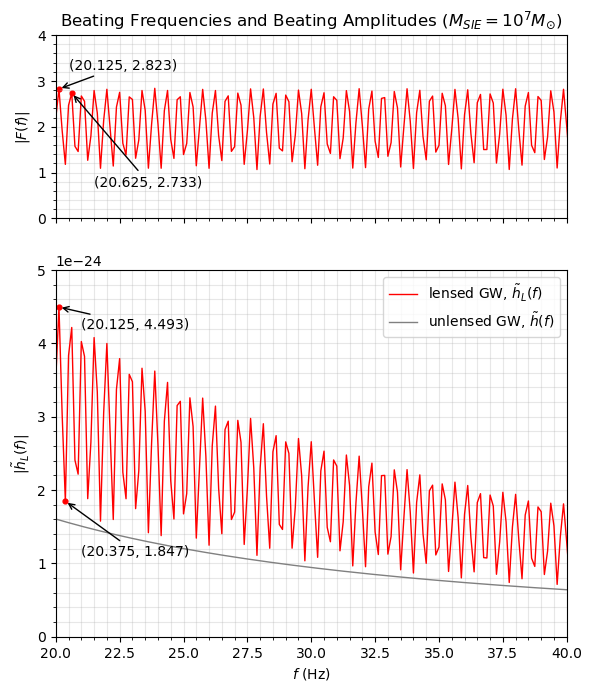

time: 634 ms (started: 2023-01-05 13:13:25 +08:00)


In [266]:
# Fringe Analysis
# mSIE = 10^7

ratio_10e7 = lensed_sH1_10e7/sH1
F_10e7 = np.abs(np.nan_to_num(ratio_10e7))

fig3, axs3 = plt.subplots(sharex=True, nrows=2, ncols=1, figsize=(6,7), gridspec_kw={'height_ratios': [1, 2]})

axs3[0].plot(freqs_lensed_10e7, F_10e7, color='red', linewidth=1)
axs3[0].scatter([freqs_lensed_10e7[1],freqs_lensed_10e7[5]], [F_10e7[1],F_10e7[5]], color='red', marker='o', s=12)
axs3[0].set_xlim([20,40])
axs3[0].set_ylim([0, 4])
axs3[0].minorticks_on()
axs3[0].set(ylabel=r'$|F(f)|$')
#axs3[0].set_xscale('log')
#axs3[0].set_yscale('log')
axs3[0].set_title(r'Beating Frequencies and Beating Amplitudes ($M_{SIE}=10^7M_{\odot}$)')
axs3[0].grid(True, which='both', alpha=0.3)
axs3[0].annotate('('+str(freqs_lensed_10e7[1])+', 2.823)', xy=(freqs_lensed_10e7[1], F_10e7[1]), xytext=(20.5, 3.25),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axs3[0].annotate('('+str(freqs_lensed_10e7[5])+', 2.733)', xy=(freqs_lensed_10e7[5], F_10e7[5]), xytext=(21.5, 0.7),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

axs3[1].plot(freqs_lensed_10e7, np.abs(lensed_sH1_10e7), color='red', linewidth=1, label=r'lensed GW, $\tilde{h}_L(f)$')
axs3[1].plot(freqs, np.abs(sH1), color='gray', linewidth=1, label=r'unlensed GW, $\tilde{h}(f)$')
axs3[1].scatter([freqs_lensed_10e7[1],freqs_lensed_10e7[3]], [np.abs(lensed_sH1_10e7)[1],np.abs(lensed_sH1_10e7)[3]], color='red', marker='o', s=12)
axs3[1].set_xlim([20,40])
axs3[1].set_ylim([0e-24, 5e-24])
#axs3[1].set_xscale('log')
#axs3[1].set_yscale('log')
#axs3[1].set_xticklabels(rotation=90)
axs3[1].minorticks_on()
axs3[1].set(xlabel=r'$f$ (Hz)', ylabel=r'$|\tilde{h}_L(f)|$')
#axs3[1].annotate(20.2, 77e-25, , color='red')
#axs3[1].text(20.4, 48e-25, str((freqs[2], 3.102)), color='red')
axs3[1].annotate('('+str(freqs_lensed_10e7[1])+', 4.493)', xy=(freqs_lensed_10e7[1], np.abs(lensed_sH1_10e7)[1]), xytext=(21, 4.2e-24),
                            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
axs3[1].annotate('('+str(freqs_lensed_10e7[3])+', 1.847)', xy=(freqs_lensed_10e7[3], np.abs(lensed_sH1_10e7)[3]), xytext=(21, 1.1e-24),
                            arrowprops=dict(arrowstyle="->", connectionstyle='arc3'))

plt.tight_layout(pad=1, w_pad=0, h_pad=2)
plt.grid(True, which='both', alpha=0.3)
plt.legend()
plt.savefig('/Users/genebelinario/Documents/dnc_research/thesis/figures/LensMass_10e7', dpi=300)
plt.show()

In [267]:
lens_mass_10e7 = (1.25*1e4)*(4.493/1.847)/(20.625-20.125)
print(lens_mass_10e7)

# 3 orders of magnitude away from 10^7

60814.834867352474
time: 1.72 ms (started: 2023-01-05 13:13:29 +08:00)
